## Dog Breed Prediction

In this project, we will see how to use Keras and TensorFlow to build, train, and test a Convolutional Neural Network capable of identifying the breed of a dog in a supplied image. This is a supervised learning problem, specifically a multiclass classification problem.

In [1]:
# Important library imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
import keras.utils as image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

Importing required libraries.

In [2]:
# Read the labels.csv file and checking shape and records
labels_all = pd.read_csv("C:/Users/SETHM/Desktop/archive/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Loading the labels data into dataframe and viewing it. Here we analysed that labels contains 10222 rows and 2 columns.  

In [3]:
# Visualize the number of each breeds
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

Here we are finding out the count per class i.e. total data in each class using value_counts() function.

In [4]:
# Selecting first 3 breeds (Limitation due to computation power)
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


We will work on only 3 breeds due to limited computational power. You can consider more classes as per your system computational power.

In [5]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img = image.load_img('C:/Users/SETHM/Desktop/archive/train/%s.jpg' % labels['id'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|████████████████████████████████████████████████████████████████████████████████| 357/357 [00:03<00:00, 97.70it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


As we are working with the classification dataset first we need to one hot encode the target value i.e. the classes. After that we will read images and convert them into numpy array and finally normalizing the array.

In [6]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


After defining the network architecture we found out the total parameters as 162,619.

In [7]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data. 

In [8]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))

Epoch 1/100
2/2 [==============================] - 15s 6s/step - loss: 4.8967 - accuracy: 0.3281 - val_loss: 4.8799 - val_accuracy: 0.3231
Epoch 2/100
2/2 [==============================] - 11s 6s/step - loss: 4.8704 - accuracy: 0.3711 - val_loss: 4.8551 - val_accuracy: 0.3385
Epoch 3/100
2/2 [==============================] - 11s 6s/step - loss: 4.8450 - accuracy: 0.3828 - val_loss: 4.8298 - val_accuracy: 0.3385
Epoch 4/100
2/2 [==============================] - 11s 6s/step - loss: 4.8193 - accuracy: 0.3711 - val_loss: 4.8047 - val_accuracy: 0.3385
Epoch 5/100
2/2 [==============================] - 11s 6s/step - loss: 4.7937 - accuracy: 0.3672 - val_loss: 4.7800 - val_accuracy: 0.3385
Epoch 6/100
2/2 [==============================] - 11s 6s/step - loss: 4.7680 - accuracy: 0.3594 - val_loss: 4.7555 - val_accuracy: 0.3385
Epoch 7/100
2/2 [==============================] - 11s 6s/step - loss: 4.7418 - accuracy: 0.3516 - val_loss: 4.7311 - val_accuracy: 0.3385
Epoch 8/100
2/2 [==========

2/2 [==============================] - 10s 5s/step - loss: 3.2561 - accuracy: 0.8320 - val_loss: 3.5345 - val_accuracy: 0.6615
Epoch 60/100
2/2 [==============================] - 11s 6s/step - loss: 3.2393 - accuracy: 0.8281 - val_loss: 3.5488 - val_accuracy: 0.6923
Epoch 61/100
2/2 [==============================] - 10s 5s/step - loss: 3.2212 - accuracy: 0.8477 - val_loss: 3.5107 - val_accuracy: 0.7077
Epoch 62/100
2/2 [==============================] - 11s 6s/step - loss: 3.1958 - accuracy: 0.8555 - val_loss: 3.5007 - val_accuracy: 0.7077
Epoch 63/100
2/2 [==============================] - 11s 6s/step - loss: 3.1756 - accuracy: 0.8438 - val_loss: 3.4895 - val_accuracy: 0.6923
Epoch 64/100
2/2 [==============================] - 11s 5s/step - loss: 3.1690 - accuracy: 0.8477 - val_loss: 3.4708 - val_accuracy: 0.7231
Epoch 65/100
2/2 [==============================] - 10s 6s/step - loss: 3.1411 - accuracy: 0.8594 - val_loss: 3.4578 - val_accuracy: 0.7231
Epoch 66/100
2/2 [===============

Now we will train our model on 100 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

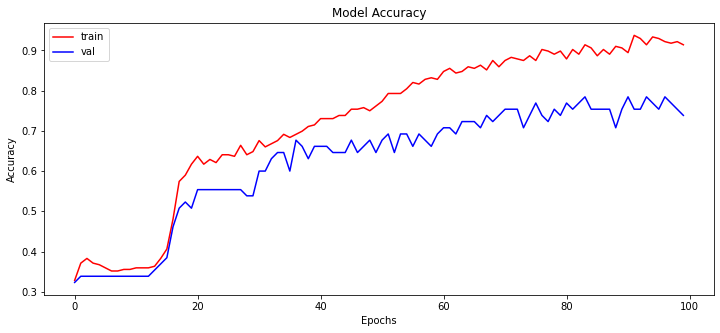

In [9]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Here we analyse how the model is learning with each epoch in terms of accuracy.

In [10]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 35ms/step - loss: 3.0794 - accuracy: 0.8611
Accuracy over the test set: 
  86.11 %


We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

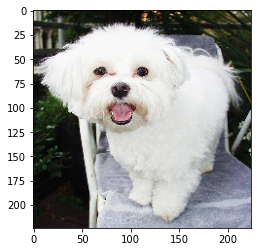

Originally :  maltese_dog
Predicted :  maltese_dog


In [11]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

Here you can see image with its original and predicted label.

## Conclusion:

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.